In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim

from torchvision import datasets, transforms, models

from backdoor.poisons import NarcissusPoison

In [2]:
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'

In [3]:
# The argumention use for surrogate model training stage
transform_surrogate_train = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomCrop(32, padding=4),  
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# The argumention use for all training set
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# The argumention use for all testing set
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [4]:
trainset = datasets.CIFAR10(root='/data/', train=True, download=False, transform=transform_train)
testset = datasets.CIFAR10(root='/data/', train=False, download=False, transform=transform_test)
pood_trainset = datasets.ImageFolder(root='/data/tiny-imagenet-200/train/', transform=transform_surrogate_train)

In [5]:
surrogate_model = models.resnet18(num_classes=201).to(device)
warmup_model = models.resnet18(num_classes=201).to(device)

In [6]:
attack = NarcissusPoison(device, pood_trainset, trainset, surrogate_model)

In [7]:
sur_epochs = 200

sur_criterion = nn.CrossEntropyLoss()
sur_optimizer = optim.SGD
sur_scheduler = optim.lr_scheduler.CosineAnnealingLR

attack.train_surrogate(sur_epochs, sur_criterion, sur_optimizer, sur_scheduler)

Epoch: 0 	Loss: 4.803604
Epoch: 1 	Loss: 4.205218
Epoch: 2 	Loss: 3.899633
Epoch: 3 	Loss: 3.701088
Epoch: 4 	Loss: 3.542384
Epoch: 5 	Loss: 3.420751
Epoch: 6 	Loss: 3.310930
Epoch: 7 	Loss: 3.238243
Epoch: 8 	Loss: 3.164552
Epoch: 9 	Loss: 3.107165
Epoch: 10 	Loss: 3.057280
Epoch: 11 	Loss: 3.004554
Epoch: 12 	Loss: 2.960058
Epoch: 13 	Loss: 2.929436
Epoch: 14 	Loss: 2.894288
Epoch: 15 	Loss: 2.857172
Epoch: 16 	Loss: 2.823339
Epoch: 17 	Loss: 2.784101
Epoch: 18 	Loss: 2.769164
Epoch: 19 	Loss: 2.727065
Epoch: 20 	Loss: 2.706500
Epoch: 21 	Loss: 2.680753
Epoch: 22 	Loss: 2.661337
Epoch: 23 	Loss: 2.644792
Epoch: 24 	Loss: 2.619257
Epoch: 25 	Loss: 2.591527
Epoch: 26 	Loss: 2.583218
Epoch: 27 	Loss: 2.559988
Epoch: 28 	Loss: 2.540160
Epoch: 29 	Loss: 2.527433
Epoch: 30 	Loss: 2.509226
Epoch: 31 	Loss: 2.493346
Epoch: 32 	Loss: 2.475180
Epoch: 33 	Loss: 2.459823
Epoch: 34 	Loss: 2.445970
Epoch: 35 	Loss: 2.426209
Epoch: 36 	Loss: 2.410257
Epoch: 37 	Loss: 2.406713
Epoch: 38 	Loss: 2.385

In [8]:
warmup_epochs = 15
warmup_criterion = nn.CrossEntropyLoss()
warmup_optim = optim.RAdam(warmup_model.parameters(), lr=0.1)

model = attack.poi_warmup(warmup_epochs, warmup_model, warmup_criterion, warmup_optim)

Epoch: 0 	Loss: 4.172802
Epoch: 1 	Loss: 4.009757
Epoch: 2 	Loss: 3.882183
Epoch: 3 	Loss: 3.883796
Epoch: 4 	Loss: 3.958849
Epoch: 5 	Loss: 3.825738
Epoch: 6 	Loss: 3.859687
Epoch: 7 	Loss: 3.750131
Epoch: 8 	Loss: 3.687736
Epoch: 9 	Loss: 3.632461
Epoch: 10 	Loss: 3.568230
Epoch: 11 	Loss: 3.583220
Epoch: 12 	Loss: 3.562276
Epoch: 13 	Loss: 3.497424
Epoch: 14 	Loss: 3.543909


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RAdam

attack.generate_trigger(1000, criterion, optimizer)

Round: 0 	Loss: 5.251570 	Avg Grad: 0.015218
Round: 1 	Loss: 5.265906 	Avg Grad: 0.005114
Round: 2 	Loss: 5.300242 	Avg Grad: 0.006237
Round: 3 	Loss: 5.226952 	Avg Grad: 0.018563
Round: 4 	Loss: 5.251582 	Avg Grad: 0.005449
Round: 5 	Loss: 5.206978 	Avg Grad: 0.005470
Round: 6 	Loss: 5.205256 	Avg Grad: 0.005240
Round: 7 	Loss: 5.174068 	Avg Grad: 0.005145
Round: 8 	Loss: 5.135567 	Avg Grad: 0.004568
Round: 9 	Loss: 5.139850 	Avg Grad: 0.016665
Round: 10 	Loss: 5.083090 	Avg Grad: 0.004559
Round: 11 	Loss: 5.120936 	Avg Grad: 0.003834
Round: 12 	Loss: 5.121342 	Avg Grad: 0.046538
Round: 13 	Loss: 5.075283 	Avg Grad: 0.004430
Round: 14 	Loss: 5.051834 	Avg Grad: 0.003796
Round: 15 	Loss: 5.122929 	Avg Grad: 0.037909
Round: 16 	Loss: 5.098158 	Avg Grad: 0.006305
Round: 17 	Loss: 5.063873 	Avg Grad: 0.023074
Round: 18 	Loss: 5.060741 	Avg Grad: 0.019863
Round: 19 	Loss: 5.043251 	Avg Grad: 0.004011
Round: 20 	Loss: 5.064983 	Avg Grad: 0.011168
Round: 21 	Loss: 5.011299 	Avg Grad: 0.00369

Round: 177 	Loss: 4.980752 	Avg Grad: 0.000022
Round: 178 	Loss: 4.917747 	Avg Grad: 0.000021
Round: 179 	Loss: 4.981874 	Avg Grad: 0.000020
Round: 180 	Loss: 4.975877 	Avg Grad: 0.000070
Round: 181 	Loss: 4.965082 	Avg Grad: 0.000092
Round: 182 	Loss: 4.942839 	Avg Grad: 0.000080
Round: 183 	Loss: 4.953860 	Avg Grad: 0.000007
Round: 184 	Loss: 4.932809 	Avg Grad: 0.000011
Round: 185 	Loss: 4.993922 	Avg Grad: 0.000074
Round: 186 	Loss: 4.945869 	Avg Grad: 0.000007
Round: 187 	Loss: 4.968627 	Avg Grad: 0.000034
Round: 188 	Loss: 4.947020 	Avg Grad: 0.000015
Round: 189 	Loss: 4.934111 	Avg Grad: 0.000010
Round: 190 	Loss: 4.975285 	Avg Grad: 0.000004
Round: 191 	Loss: 4.964132 	Avg Grad: 0.000009
Round: 192 	Loss: 4.973103 	Avg Grad: 0.000006
Round: 193 	Loss: 4.950941 	Avg Grad: 0.000006
Round: 194 	Loss: 4.971504 	Avg Grad: 0.000028
Round: 195 	Loss: 4.943011 	Avg Grad: 0.000006
Round: 196 	Loss: 4.956365 	Avg Grad: 0.000005
Round: 197 	Loss: 4.950570 	Avg Grad: 0.000004
Round: 198 	L

In [10]:
noise = attack.noise

In [11]:
def plot_img(img, title=''):
    if len(img.shape) > 3:
        img = img[0]
    img = np.moveaxis(img, 0, -1)
    img = np.clip(img, 0, 1)
    
    plt.imshow(img)
    plt.title(title)
    plt.show()

(3, 32, 32)


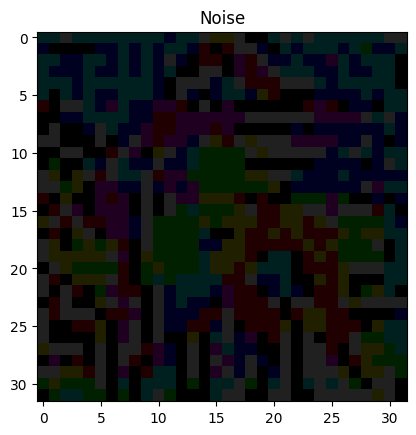

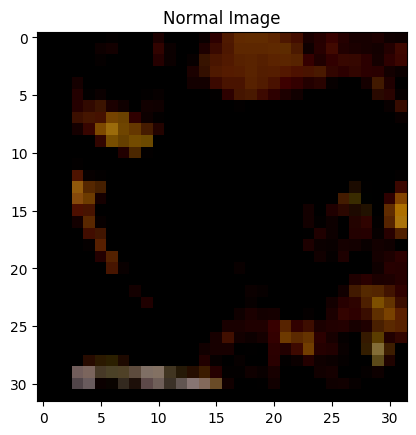

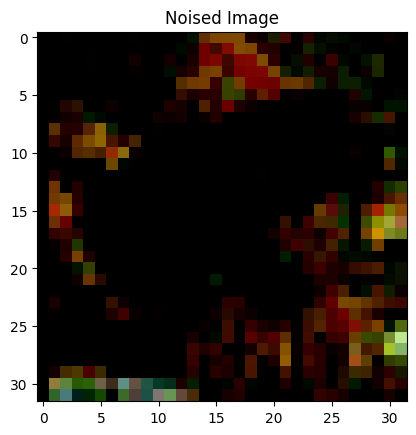

In [12]:
idx = 23

noised_img = trainset[idx][0].numpy() + noise[0]
print(noised_img.shape)

plot_img(noise, 'Noise')
plot_img(trainset[idx][0].numpy(), 'Normal Image')
plot_img(noised_img, 'Noised Image')

In [13]:
np.save('./noise.npy', noise)

In [14]:
poison_amount = 25

noise_testing_model = models.resnet18(num_classes=10)
noise_testing_model = noise_testing_model.to(device)

train_epochs = 200
train_lr = 0.1
test_batch_size = 150

multi_test = 3
random_seed = 65

In [15]:
np.random.seed(random_seed)
random.seed(random_seed)
torch.manual_seed(random_seed)
model = noise_testing_model

optimizer = optim.SGD(params=model.parameters(), lr=train_lr, momentum=0.9, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=train_epochs)

In [16]:
target_class = 0
train_target_list = list(np.where(np.array(trainset.targets) == target_class)[0])

transform_after_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  
    transforms.RandomHorizontalFlip(),
])

In [17]:
# Get poisoned dataset for training the model
class PoisonedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, indices, noise, transform):
        self.dataset = dataset
        self.indices = indices
        self.noise = noise
        self.transform = transform
    
    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        if idx in self.indices:
            image += self.noise
        if self.transform is not None:
            image = self.transform(image)
        return (image, label)

    def __len__(self):
        return len(self.dataset)
    
random_poison_idx = random.sample(train_target_list, poison_amount)
poison_train_target = PoisonedDataset(trainset, random_poison_idx, noise[0], transform_after_train)

In [18]:
print('Traing dataset size is:',len(poison_train_target)," Poison numbers is:",len(random_poison_idx))
clean_train_loader = torch.utils.data.DataLoader(poison_train_target, batch_size=test_batch_size, shuffle=True, num_workers=5)
clean_test_loader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False, num_workers=5)

Traing dataset size is: 50000  Poison numbers is: 25


In [19]:
test_non_target = list(np.where(np.array(testset.targets)!= target_class)[0])

class AsrDataset(torch.utils.data.Dataset):
    
    def __init__(self, dataset, indices, taget_class, noise, magnify):
        self.dataset = torch.utils.data.Subset(dataset, indices)
        self.target_class = target_class
        self.noise = noise
        if len(noise.shape) > 3:
            self.noise = noise[0]
        self.magnify = magnify
    
    def __getitem__(self, idx):
        img = self.dataset[idx][0]
        img += self.noise * self.magnify
        return (img, self.target_class)
    
    def __len__(self):
        return len(self.dataset)
    
test_target_indices = list(np.where(np.array(testset.targets) == target_class)[0])
test_target_dataset = torch.utils.data.Subset(testset, test_target_indices)

asr_testset = AsrDataset(testset, test_non_target, 0, noise, 3)

asr_loader = torch.utils.data.DataLoader(asr_testset, batch_size=test_batch_size, shuffle=False, num_workers=5)
target_test_loader = torch.utils.data.DataLoader(test_target_dataset, batch_size=test_batch_size, shuffle=False, num_workers=5)

In [ ]:
for epoch in range(train_epochs):
    
    print(f'Epoch: [{epoch+1}/{train_epochs}]')
    
    model.train()
    train_losses = []
    for images, labels in clean_train_loader:
        images, labels = images.to(device), labels.to(device)
        model.zero_grad()
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        
    print(f'Train Loss: {sum(train_losses)/len(train_losses)}')
    
    model.eval()
    
    # Get clean test accuracy
    correct_clean, total_clean = 0, 0
    for i, (images, labels) in enumerate(clean_test_loader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            logits = model(images)
            _, predicted = torch.max(logits.data, 1)
            total_clean += labels.size(0)
            correct_clean += (predicted == labels).sum().item()
    acc_clean = correct_clean / total_clean
    print('Clean Test Accuracy %.2f' % (acc_clean))
    
    # Get target clean accuracy
    correct_tar, total_tar = 0, 0
    for i, (images, labels) in enumerate(target_test_loader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            logits = model(images)
            _, predicted = torch.max(logits.data, 1)
            total_tar += labels.size(0)
            correct_tar += (predicted == labels).sum().item()
    acc_tar = correct_tar / total_tar
    print('\nTarget Test Clean Accuracy %.2f' % (acc_tar))

    # Get Attack Success Rate
    correct, total = 0, 0
    for i, (images, labels) in enumerate(asr_loader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            logits = model(images)
            _, predicted = torch.max(logits.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct/total
    print(f'Attack Success Rate: {acc}')
    
    print()

Epoch: [1/200]
Train Loss: 2.179105043411255
Clean Test Accuracy 0.38

Target Test Clean Accuracy 0.48
Attack Success Rate: 0.077

Epoch: [2/200]
Train Loss: 1.6318261623382568
Clean Test Accuracy 0.46

Target Test Clean Accuracy 0.57
Attack Success Rate: 0.043444444444444445

Epoch: [3/200]
Train Loss: 1.4664232730865479
Clean Test Accuracy 0.50

Target Test Clean Accuracy 0.44
Attack Success Rate: 0.014555555555555556

Epoch: [4/200]
Train Loss: 1.2995351552963257
Clean Test Accuracy 0.58

Target Test Clean Accuracy 0.65
Attack Success Rate: 0.049777777777777775

Epoch: [5/200]
Train Loss: 1.1724722385406494
Clean Test Accuracy 0.63

Target Test Clean Accuracy 0.74
Attack Success Rate: 0.025666666666666667

Epoch: [6/200]
Train Loss: 1.083250641822815
Clean Test Accuracy 0.65

Target Test Clean Accuracy 0.80
Attack Success Rate: 0.05177777777777778

Epoch: [7/200]
Train Loss: 1.0246573686599731
Clean Test Accuracy 0.64

Target Test Clean Accuracy 0.73
Attack Success Rate: 0.013666666

In [ ]:
img = testset[0][0]

plot_img(img.numpy())
plot_img(img.numpy() + noise[0] * 3)


In [ ]:
def output(model, idx, noise=None, magnify=1):
    img = testset[idx][0]
    if noise is not None:
        img += noise[0]
    logits = model(img.unsqueeze(dim=0).to(device))
    _, predicted = torch.max(logits, 1)
    return predicted.item(), testset[idx][1]

output(model, 3, noise, 3)